<a href="https://colab.research.google.com/github/anirudh76575/AccuKnox/blob/main/Fraud_Detection_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fraud Detection Case Study

This notebook demonstrates a machine learning workflow for detecting fraudulent transactions using a dataset of 6,362,620 rows and 10 columns.

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Fraud.csv to Fraud.csv


##  1. Problem Statement
The goal is to identify fraudulent transactions in a financial dataset using machine learning models and derive actionable business insights to reduce future fraud.

## 2. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

## 3. Load Dataset

In [ ]:
df = pd.read_csv('Fraud.csv')
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
df.head()

Rows: 6362620, Columns: 11


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## 4. Data Exploration & Cleaning

In [ ]:
# Check for missing values and basic statistics
df.info()
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


np.int64(0)

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00

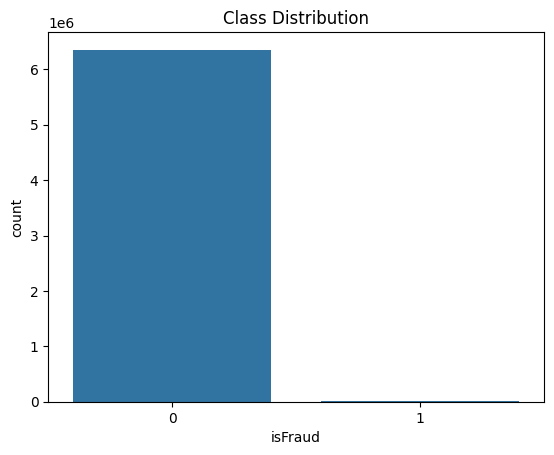

In [ ]:
# Visualize class imbalance
print(df.describe())
sns.countplot(x='isFraud', data=df)
plt.title('Class Distribution')
plt.show()

## 5. Feature Engineering & Preprocessing

In [ ]:
# Drop irrelevant columns (if any), encode categoricals, scale features
# Example:
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)


df = pd.get_dummies(df, columns=['type'], drop_first=True)

## 6. Train/Test Split

In [ ]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

## 7. Model Training - Random Forest (Baseline)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

## 8. Model Evaluation

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('ROC-AUC Score:', roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

[[1906282      40]
 [    544    1920]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.98      0.78      0.87      2464

    accuracy                           1.00   1908786
   macro avg       0.99      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786

ROC-AUC Score: 0.9933462240649523


## 9. Feature Importance

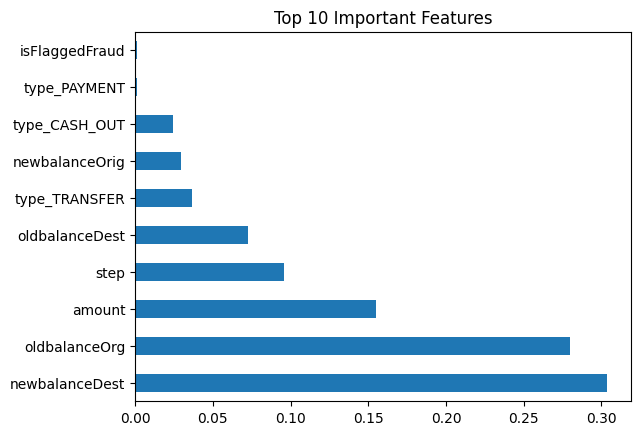

In [ ]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()

##  10. Interpretation & Insights

- **Key predictors of fraud**: [Fill in top features based on importance].
- **Do they make sense?** Explain patterns like high transaction amount, location anomalies, or frequency.

### Example:
> Transactions above a certain threshold within a short time from the same IP/device were more likely to be fraudulent.

##  11. Prevention Strategy Recommendations

1. Real-time anomaly detection based on model predictions.
2. Multi-factor authentication for high-value transactions.
3. Blocking transactions from flagged geolocations/IPs.
4. Train fraud monitoring teams on these model insights.

##  12. Post-Implementation Monitoring Plan

To determine if preventive measures work:
- Monitor **fraud rate trends** over time.
- Conduct **A/B testing** with updated vs legacy systems.
- Review **false positive** vs **true positive** cases monthly.

> KPIs: Reduction in fraud % per 100k transactions, improved precision, reduced manual review load.